In [8]:
pip install matplotlib pandas seaborn numpy tqdm

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

# Load the data
data = []
with open('/Users/toodles09/Desktop/AA_DataSci_Portfolio/daylilies.jsonl', 'r') as f:
    for line in f:
        data.append(json.loads(line))

# Convert to DataFrame
df = pd.DataFrame(data)

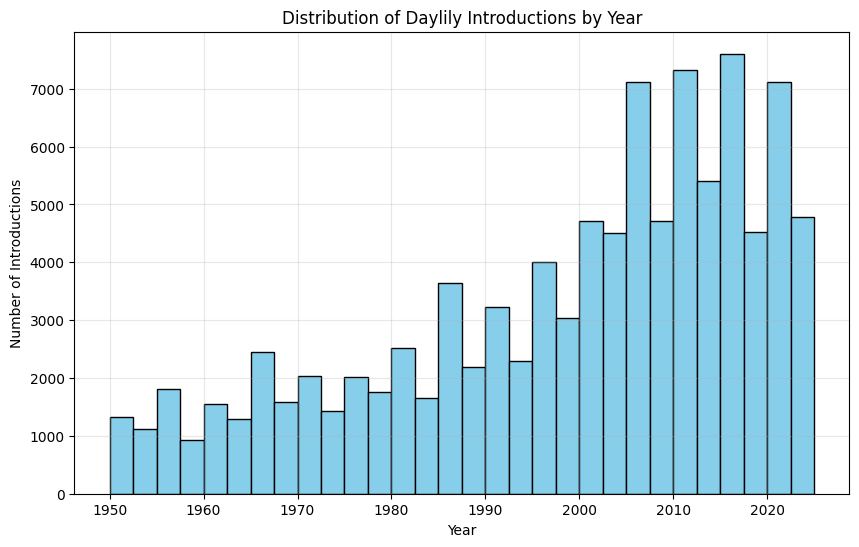

In [12]:
# 1. Plot year distribution
years = pd.to_numeric(df['year'], errors='coerce')
years = years[years >= 1950]
plt.figure(figsize=(10, 6))
plt.hist(years, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Daylily Introductions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Introductions')
plt.grid(True, alpha=0.3)
plt.show()

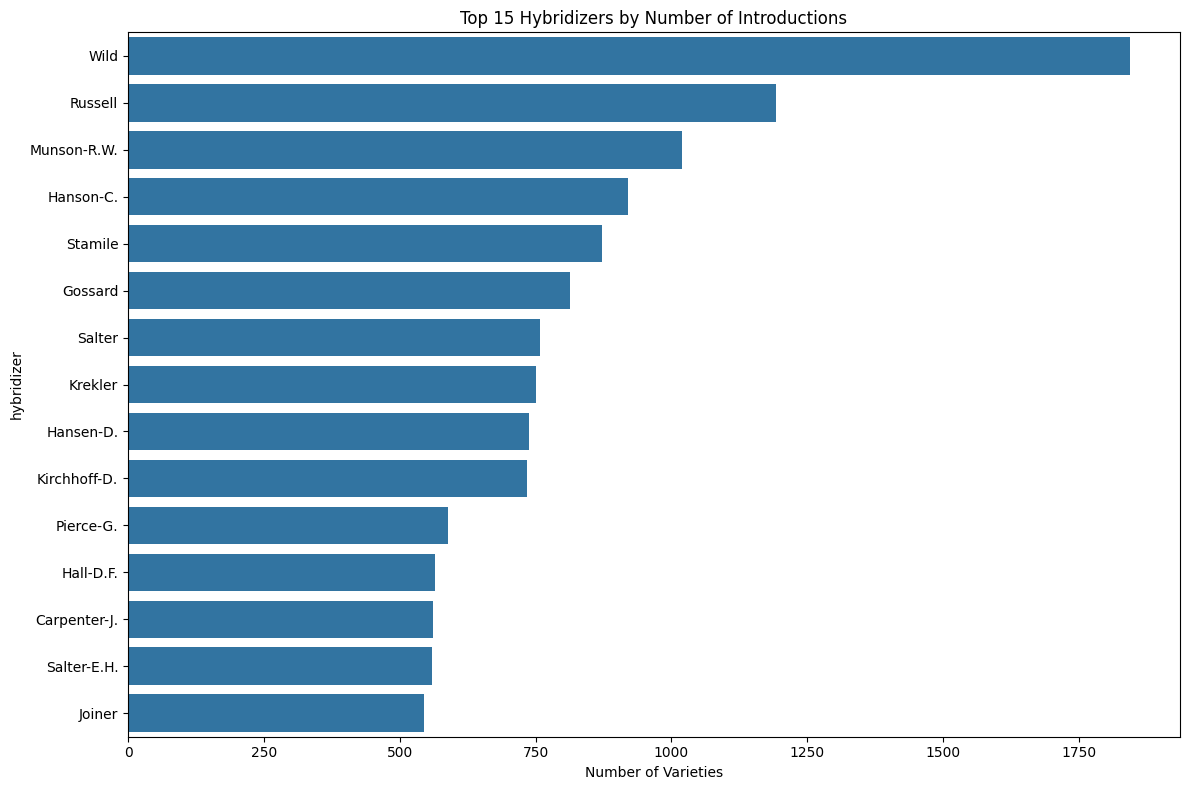

In [13]:
# 2. Plot top hybridizers
hybridizer_counts = df['hybridizer'].value_counts().head(15)
plt.figure(figsize=(12, 8))
sns.barplot(x=hybridizer_counts.values, y=hybridizer_counts.index)
plt.title('Top 15 Hybridizers by Number of Introductions')
plt.xlabel('Number of Varieties')
plt.tight_layout()
plt.show()


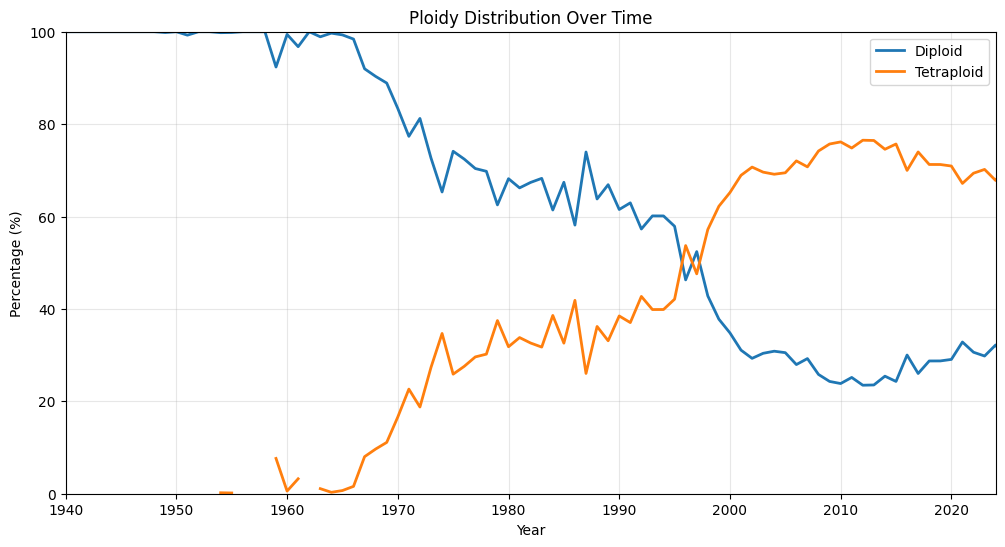

In [21]:
# 3. Matplotlib: Plot ploidy distribution over time (line graph)
# Convert year to number and filter data
df['year_numeric'] = pd.to_numeric(df['year'])
ploidy_years = df[['year_numeric', 'ploidy']].dropna()
ploidy_years = ploidy_years[ploidy_years['year_numeric'] >= 1940]

# Calculate percentage of each ploidy type by year
yearly_counts = ploidy_years.groupby(['year_numeric', 'ploidy']).size().unstack()
yearly_pct = yearly_counts.div(yearly_counts.sum(axis=1), axis=0) * 100

# Create line plot
plt.figure(figsize=(12, 6))
for column in yearly_pct.columns:
    plt.plot(yearly_pct.index, yearly_pct[column], linewidth=2, label=column)

# Add labels and legend
plt.title('Ploidy Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.xlim(1940, 2024)
plt.ylim(0, 100)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

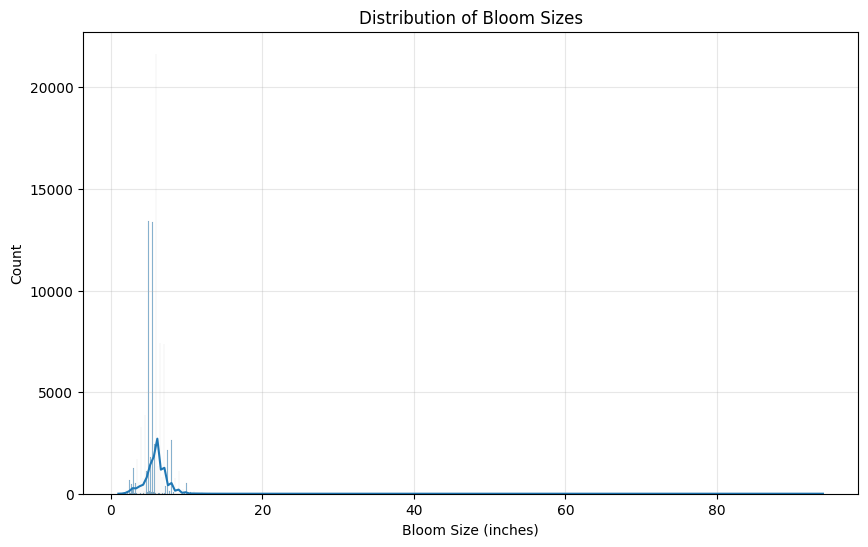

In [15]:
# 4. Plot bloom size distribution
# Extract numeric values from bloom_size
def extract_inches(size_str):
    if pd.isna(size_str):
        return None
    try:
        return float(size_str.split()[0])
    except:
        return None

df['bloom_size_inches'] = df['bloom_size'].apply(extract_inches)

plt.figure(figsize=(10, 6))
sns.histplot(df['bloom_size_inches'].dropna(), kde=True)
plt.title('Distribution of Bloom Sizes')
plt.xlabel('Bloom Size (inches)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()


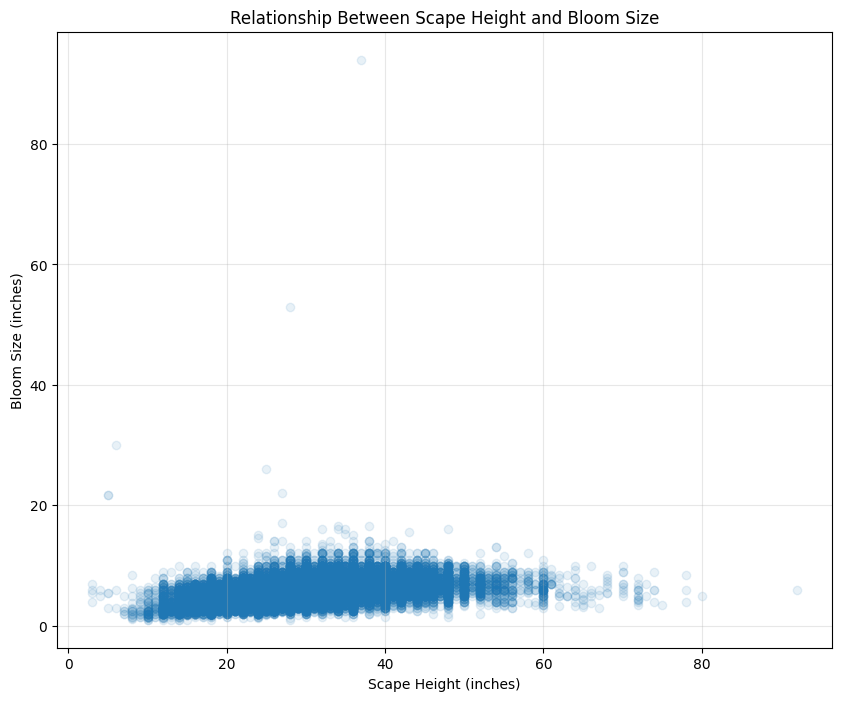

In [16]:
# 5. Matplotlib: Plot scape height vs bloom size
df['scape_height_inches'] = df['scape_height'].apply(extract_inches)
plt.figure(figsize=(10, 8))
plt.scatter(df['scape_height_inches'], df['bloom_size_inches'], alpha=0.1)
plt.title('Relationship Between Scape Height and Bloom Size')
plt.xlabel('Scape Height (inches)')
plt.ylabel('Bloom Size (inches)')
plt.grid(True, alpha=0.3)
plt.show()

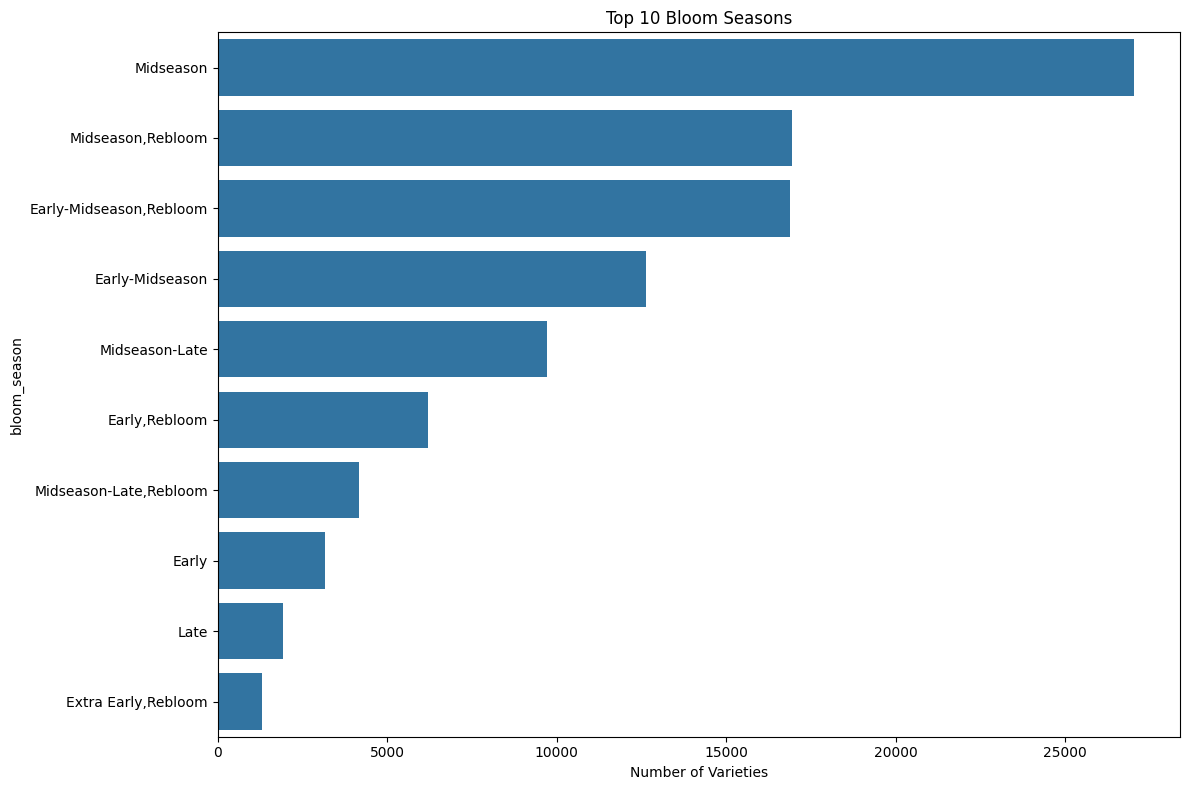

In [ ]:
# 6. Plot bloom season distribution
season_counts = df['bloom_season'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=season_counts.values, y=season_counts.index) 
plt.title('Top 10 Bloom Seasons')
plt.xlabel('Number of Varieties')
plt.tight_layout()
plt.show()